In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import os

### Loading CSV Files from Results folder

In [2]:
print("Loading results from:")
files_path = os.path.realpath(os.path.join(os.path.abspath(''), '..', '..', 'Results','MPEC','01_2_NoCategory'))
print("\t",files_path)
files_name = 'Model_data_DA_'

ncda = 9

data = []
for j in range(1,ncda+1):
    path = os.path.join(files_path,files_name+str(j)+'.csv')
    print("Reading file {} : {}".format(j,path))
    data.append(pd.read_csv(path))

Loading results from:
	 D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Results\MPEC\01_2_NoCategory
Reading file 1 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Results\MPEC\01_2_NoCategory\Model_data_DA_1.csv
Reading file 2 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Results\MPEC\01_2_NoCategory\Model_data_DA_2.csv
Reading file 3 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Results\MPEC\01_2_NoCategory\Model_data_DA_3.csv
Reading file 4 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Results\MPEC\01_2_NoCategory\Model_data_DA_4.csv
Reading file 5 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Results\MPEC\01_2_NoCategory\Model_data_DA_5.csv
Reading file 6 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Results\MPEC\01_2_NoCategory\Model_data_DA_6.csv
Reading file 7 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Results\MPEC\01_2_NoCategory\Model_data_DA_7.csv
Reading file 8 : D:\GitHub\PyomoModels\09_MPEC_Biddin

In [3]:
data[0].head()

,Iteration,DAs_load\nE_DAs_L,DAs_generation\nE_DAs_G,DAs_demand_bid\nb_t,DAs_supply_offer\no_t,EVs_Charge,EVs_Discharge,TCL_Power,SL_Power,Inflexible_loads,...,Bus3_price,Bus4_price,Bus5_price,Bus6_price,Theta_bus_1,Theta_bus_2,Theta_bus_3,Theta_bus_4,Theta_bus_5,Theta_bus_6
0,0,0.039553,0.0,0.039553,0.0,0.000000,0.0,0.0,0.003530,0.035159,...,15.0,15.0,15.0,15.0,0.0,-0.006596,-0.008285,-0.005246,-0.006517,-0.009107
1,0,0.350583,0.0,0.350583,0.0,0.065021,0.0,0.0,0.041526,0.061350,...,15.0,15.0,15.0,15.0,0.0,-0.036616,-0.045702,-0.030674,-0.034154,-0.050122
2,0,0.660864,0.0,0.660864,0.0,0.109957,0.0,0.0,0.030172,0.078352,...,15.0,15.0,15.0,15.0,0.0,-0.073921,-0.090948,-0.068923,-0.077574,-0.099232
3,0,0.866485,0.0,0.866485,0.0,0.320426,0.0,0.0,0.063775,0.081093,...,15.0,15.0,15.0,15.0,0.0,-0.098299,-0.121478,-0.088803,-0.098290,-0.132753
4,0,1.086416,0.0,1.086416,0.0,0.256255,0.0,0.0,0.067291,0.080402,...,15.0,15.0,15.0,15.0,0.0,-0.118867,-0.147282,-0.105323,-0.117471,-0.161105


### Dropping iteration zero [0] 
The first iteration is only for warmup as DAs prediction/forecast for rivals

In [4]:
for df in data:
    df.drop(df[df.Iteration==0].index, inplace=True)
    #df.reset_index(level='index' , inplace=True)

In [5]:
# # Dictionary for DAs categories
# categories = dict()

# for j in range(1,ncda+1):
#     if j %2 == 0:
#         categories['DA'+str(j)] = "CAT_01"
#     elif j % 3== 0:
#         categories['DA'+str(j)] = "CAT_02"
#     elif j % 5 == 0:
#         categories['DA'+str(j)] = "CAT_03"
#     else:
#         categories['DA'+str(j)] = "CAT_04"

In [10]:
EVs_charge=[]
EVs_discharge=[]
load =[]
generation =[]
bus_price = []
time = [x for x in range(16,40)]
iter_time =[]
cat = []
DA  = []

In [11]:
for i in range(ncda):
    df=data[i]
    EVs_charge.extend(df['EVs_Charge'])
    EVs_discharge.extend(df['EVs_Discharge'])
    load.extend(df['DAs_load\nE_DAs_L'])
    generation.extend(df['DAs_generation\nE_DAs_G'])
    for b in range(1,7):
        if len(bus_price)==6:
            temp = bus_price[b-1]
            temp.extend(df['Bus'+str(b)+'_price'])
            bus_price[b-1] = temp
        else:
            temp =  df['Bus'+str(b)+'_price'].tolist()
            bus_price.append(temp)
    #cat.extend([categories['DA'+str(i+1)]]*24)
    DA.extend(["DA"+str(i+1)]*24)
    if i > 0:
        time.extend([x for x in range(16,40)])
    else:
        time = [x for x in range(16,40)]

In [12]:
temp = {'EVs_charge':EVs_charge,
                  'EVs_discharge':EVs_discharge,
                  'load':load,
                  'generation':generation,
                  'time':time,
       #'category':cat,
       'DA':DA}
for b in range(1,7):
    temp['Bus'+str(b)+'_price'] = bus_price[b-1]

df = pd.DataFrame(temp)

In [13]:
for x in range(16,40):
    if x >=24:
        index = df[df['time'] == x].index
        df.loc[index,'time'] = df.time[index]%24
        #print(df.time[index]%24)

In [14]:
# Selected and categorized data
#df.time[[0,1,5]]%10
#df['time']

### EVS Charge/Discharge for each category

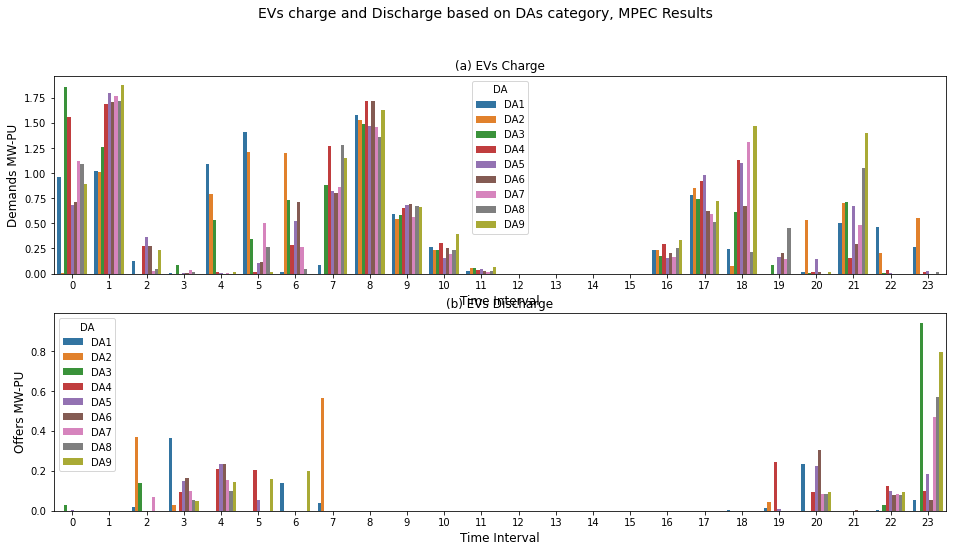

In [25]:
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

#order = ['Mixed', 'Fixed_EVs', 'Fixed_PVs']

sns.barplot(data= df.groupby(['time', 'DA']).mean().reset_index(),
            x='time', y='EVs_charge', hue='DA', ax=axes[0])#hue='category'

axes[0].set_title("(a) EVs Charge", fontsize=12)
axes[0].set_xlabel('Time Interval',fontsize=12);
axes[0].set_ylabel('Demands MW-PU',fontsize=12);


sns.barplot(data= df.groupby(['time', 'DA']).mean().reset_index(),
            x='time', y='EVs_discharge', hue='DA', ax=axes[1]) # hue='category',

axes[1].set_title("(b) EVs Discharge", fontsize=12)
axes[1].set_xlabel('Time Interval',fontsize=12);
axes[1].set_ylabel('Offers MW-PU',fontsize=12);


fig.suptitle('EVs charge and Discharge based on DAs category, MPEC Results', fontsize=14, y=1.);

### Bus Price 

In [31]:
def drop_non_selection(dataframe, selection):
    temp = df.groupby(['time', 'DA']).mean().reset_index()
    drop_list=[]
    for col in temp.columns:
        if col not in selection:
            drop_list.append(col)

    temp.drop(columns= drop_list, inplace=True )
    return temp

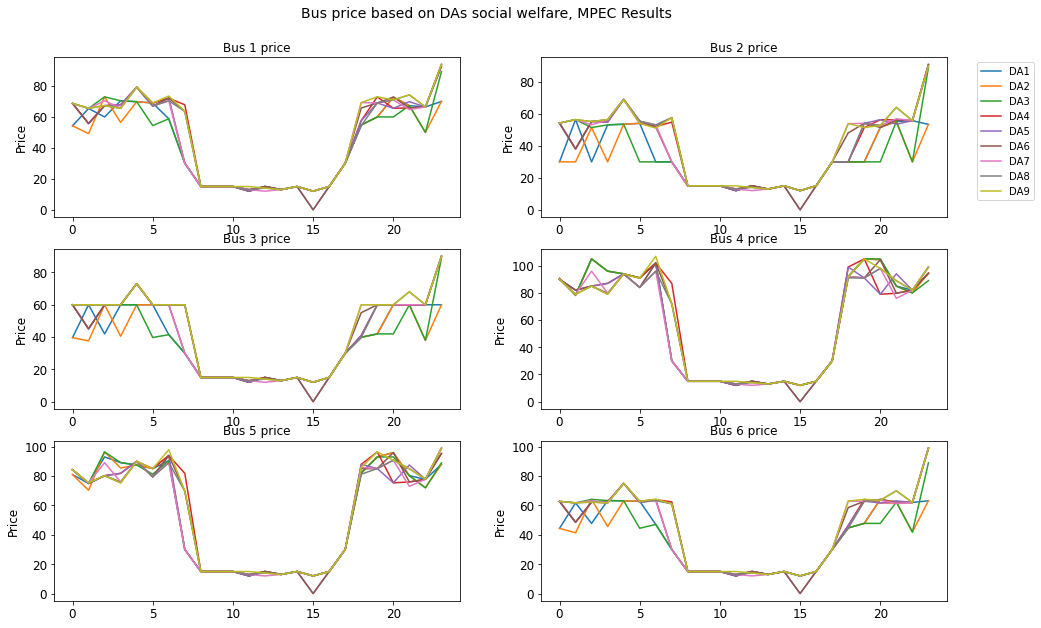

In [32]:
fig, axes = plt.subplots(3, 2, figsize=(16, 10))

#order = ['Mixed', 'Fixed_EVs', 'Fixed_PVs']
bus_names = ['Bus'+str(i)+'_price' for i in range(1,7)]

row=0
col=0

for i in range(1,7):
    temp = df.groupby(['time', 'DA']).mean().reset_index()
    selection = ['time', 'DA', bus_names[i-1]]
    temp = drop_non_selection(temp, selection)
    
    col = (i-1)%2
    if i>1 and col==0:
        row=row+1
    
    sns.lineplot(data= df.groupby(['time', 'DA']).mean().reset_index(),
                 x='time', y=bus_names[i-1], hue='DA', ax=axes[row,col])
    axes[row,col].set_title("Bus {} price".format(i), fontsize=12)
    axes[row,col].set_xlabel("")
    axes[row,col].set_ylabel("Price")

fig.suptitle('Bus price based on DAs social welfare, MPEC Results', fontsize=14, y=0.95);

handles, labels = axes.flatten()[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper right')
fig.legend(handles, labels, bbox_to_anchor=(0.98, 0.88))

for ax in axes.flatten():
    ax.get_legend().remove()
    #ax.set_rasterized(True)
    for item in ([ ax.xaxis.label, ax.yaxis.label] +ax.get_xticklabels() + ax.get_yticklabels()): # [ ax.yaxis.label] + 
        item.set_fontsize(12)

In [16]:
df

,EVs_charge,EVs_discharge,load,generation,time,DA,Bus1_price,Bus2_price,Bus3_price,Bus4_price,Bus5_price,Bus6_price
0,0.230809,0.000000,0.352009,0.000000,16,DA1,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
1,0.783745,0.000000,1.277717,0.000000,17,DA1,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
2,0.240322,0.001762,0.581510,0.000000,18,DA1,54.626168,30.000000,39.887974,92.000000,82.112026,44.698331
3,0.000000,0.012354,0.197648,0.000000,19,DA1,59.789720,30.000000,41.961259,105.000000,93.038741,47.780240
4,0.013532,0.235059,0.000000,0.105739,20,DA1,72.565705,51.569566,60.000000,104.430434,96.000000,64.101285
...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.068000,0.000000,0.030758,0.000000,11,DA9,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
212,0.000000,0.000000,0.005159,0.000000,12,DA9,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
213,0.000000,0.000000,0.166807,0.000000,13,DA9,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
214,0.000000,0.000000,0.060070,0.000000,14,DA9,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
